# LightGBM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

### MODEL & TRAINING

In [4]:
!pip install lightgbm

You should consider upgrading via the 'c:\users\ertug\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
import lightgbm
from lightgbm import LGBMRegressor

In [6]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)

In [8]:
y_pred = lgbm_model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

363.8712087611089

In [11]:
r2_score(y_test, y_pred)

0.3883739925283991

### MODEL TUNING

In [12]:
dir(lgbm_model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_doc',
 '_best_iteration',
 '_best_score',
 '_check_n_features',
 '_class_map',
 '_class_weight',
 '_classes',
 '_estimator_type',
 '_evals_result',
 '_fobj',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_classes',
 '_n_features',
 '_n_features_in',
 '_objective',
 '_other_params',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'best_iteration_',
 'best_score_',
 'booster_',
 'boosting_type',
 'class_weight',
 'colsample_bytree',
 'evals_result_',
 'feature_importances_',
 'feature_name_',
 'fit',
 'get_params',
 'importance_type

In [22]:
lgbm_params = {"learning_rate": [.1, .01, .001, .5, 1.0],
               "n_estimators": [100, 200, 50, 20, 500, 1000],
               "max_depth": range(1, 11)}

In [23]:
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2556 tasks      | elapsed:  2.1min


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.6min finished


In [24]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [25]:
lgbm_tuned = LGBMRegressor(learning_rate=lgbm_cv_model.best_params_.get("learning_rate"),
                         max_depth=lgbm_cv_model.best_params_.get("max_depth"),
                         n_estimators=lgbm_cv_model.best_params_.get("n_estimators")).fit(X_train,
                                                                                          y_train)

In [26]:
y_pred = lgbm_tuned.predict(X_test)

In [27]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

371.5044868943621

In [28]:
r2_score(y_test, y_pred)

0.3624434910123553

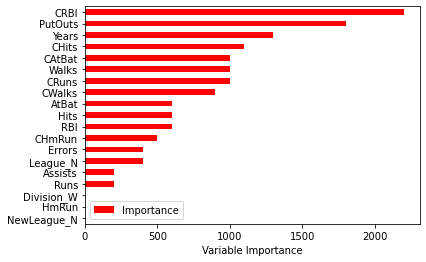

In [39]:
Importance = pd.DataFrame({"Importance":lgbm_tuned.feature_importances_*100},
                           index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")  # ascerding --> büyükten küçüğe
plt.xlabel("Variable Importance");
# plt.gca().legend_ = None